<a href="https://colab.research.google.com/github/rohan260696/CE888-LAB-Solutions-/blob/master/CE888%20PROJECT%5CCE888_PRJ_CLASSIFIER_SELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASSIFIER SELECTION**

# Data Loading and Processing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle

In [0]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/rohan260696/CE888-LAB-Solutions-/master/CE888%20PROJECT/CE888PROJECT_EXTENDED_DATASET.csv')

In [0]:
df.head(5)

,State0,State1,State2,State3,State4,State5,State6,State7,State8,Player,Move
0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,2,4
2,1,0,0,0,2,0,0,0,0,1,2
3,1,0,1,0,2,0,0,0,0,2,1
4,1,2,1,0,2,0,0,0,0,1,7


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17436 entries, 0 to 17435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   State0  17436 non-null  int64
 1   State1  17436 non-null  int64
 2   State2  17436 non-null  int64
 3   State3  17436 non-null  int64
 4   State4  17436 non-null  int64
 5   State5  17436 non-null  int64
 6   State6  17436 non-null  int64
 7   State7  17436 non-null  int64
 8   State8  17436 non-null  int64
 9   Player  17436 non-null  int64
 10  Move    17436 non-null  int64
dtypes: int64(11)
memory usage: 1.5 MB


## Checking Class Balance

In [0]:
df['Move'].value_counts()

4    2000
0    1989
1    1936
6    1929
3    1928
7    1925
5    1915
8    1909
2    1905
Name: Move, dtype: int64

# Splitting the data into training and testing set 80-20 %

In [0]:
Y,X = df.Move, df.drop(columns=['Move'])
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.20,random_state = 42)
Xtrain,Ytrain = shuffle(Xtrain,Ytrain)
#smote = SMOTE(random_state = 42)
#Xtrain,Ytrain = smote.fit_sample(Xtrain, Ytrain)

# Quick evaluation of suitable Classifier models

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsOneClassifier

In [0]:
def eval_model():

  '''Evaluate different classifier models (Quick) and compare them using 10 fold 
   cross validation for selection of the best model '''
  
  clf_KNN  = KNeighborsClassifier()
  clf_SVC  = SVC(probability  = True, random_state = 42)
  clf_DT   = tree.DecisionTreeClassifier(random_state = 42)
  clf_LDA  = LinearDiscriminantAnalysis()
  clf_LR   = LogisticRegression(max_iter = 1000, random_state = 42)
  clf_BNB  = BernoulliNB()
  clf_SGDC = SGDClassifier(loss = 'log',random_state = 42)
  
  classifiers = [clf_KNN, clf_SVC, clf_DT, clf_LDA, clf_LR, clf_BNB, clf_SGDC]
  
  clf_mean = []
  clf_std = []
  
  for clf in classifiers:
    scores = cross_val_score(clf, Xtrain, Ytrain,scoring = "f1_weighted", cv=10, n_jobs =-1)
    score_mean = scores.mean()*100
    clf_mean.append(score_mean)
    score_std = scores.std()*100
    clf_std.append(score_std)
  return classifiers, clf_mean, clf_std

classifiers, clf_mean, clf_std = eval_model()

[73.1817808692916, 75.03814553621703, 75.58649389098345, 57.247326219080264, 63.38591315495658, 47.33953699685937, 59.524085645321364]


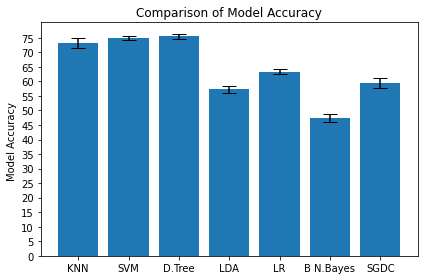

In [0]:
model = ['KNN', 'SVM', 'D.Tree', 'LDA', 'LR', 'B N.Bayes', 'SGDC']
x_pos = [1,2,3,4,5,6,7]
y = clf_mean
e = clf_std
fig, ax = plt.subplots()
ax.bar(x_pos, y, yerr=e, align='center', alpha=1, ecolor='black', capsize=7)
ax.set_ylabel('Model Accuracy ')
ax.set_xticks(x_pos)
ax.set_xticklabels(model)
ax.set_title('Comparison of Model Accuracy')
plt.yticks(np.arange(0, 80, 5))
print(y)
# Save the figure and show
plt.tight_layout()
plt.savefig('comparison of Model Accuracy.png')
plt.show()

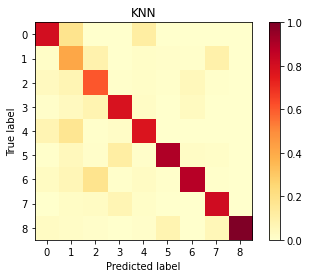

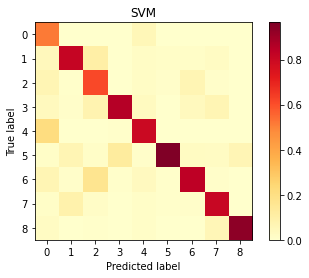

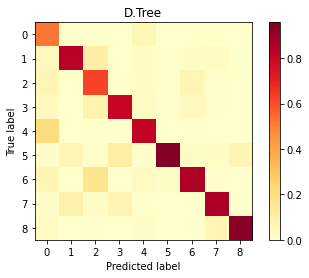

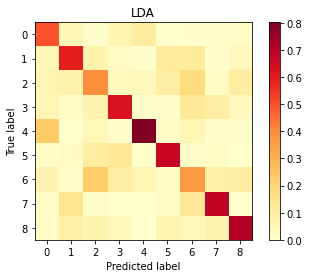

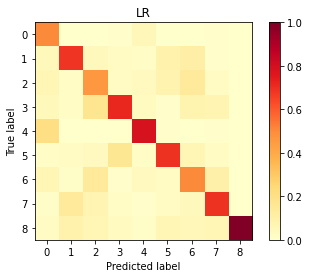

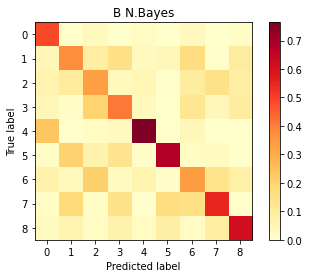

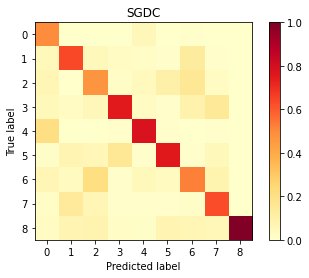

In [0]:
i = 0
for clf in classifiers:
  clf.fit(Xtrain,Ytrain)
  fig = plot_confusion_matrix(clf,Xtrain,Ytrain,normalize='pred',cmap='YlOrRd',include_values=False)
  name = model[i]
  filename = 'ConfusionMatrix' + model[i] + '.png'
  plt.title(name)
  plt.savefig(filename)
  i=i+1

In [0]:
from scipy.stats import pearsonr

clr_mat = np.zeros((7,7))

for i in range(0,7,1):
  a = classifiers[i].predict(Xtest)
  for j in range(i+1,7,1):
    b = classifiers[j].predict(Xtest)
    corelation,pval = pearsonr(a,b)
    clr_mat[i][j] = corelation
    print("corelation for",model[i],"and",model[j],'is','{:.2f}'.format(corelation))

corelation for KNN and SVM is 0.89
corelation for KNN and D.Tree is 0.91
corelation for KNN and LDA is 0.64
corelation for KNN and LR is 0.70
corelation for KNN and B N.Bayes is 0.60
corelation for KNN and SGDC is 0.67
corelation for SVM and D.Tree is 0.96
corelation for SVM and LDA is 0.75
corelation for SVM and LR is 0.81
corelation for SVM and B N.Bayes is 0.69
corelation for SVM and SGDC is 0.79
corelation for D.Tree and LDA is 0.72
corelation for D.Tree and LR is 0.78
corelation for D.Tree and B N.Bayes is 0.68
corelation for D.Tree and SGDC is 0.76
corelation for LDA and LR is 0.87
corelation for LDA and B N.Bayes is 0.74
corelation for LDA and SGDC is 0.84
corelation for LR and B N.Bayes is 0.66
corelation for LR and SGDC is 0.92
corelation for B N.Bayes and SGDC is 0.68


Corelation Matrix


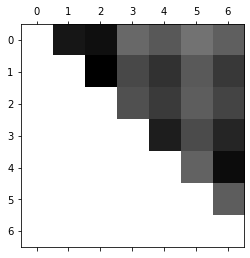

In [0]:
print('Corelation Matrix')
plt.matshow(clr_mat,cmap = 'Greys') 

In [0]:
from sklearn.ensemble import VotingClassifier
model1 = ('DT',classifiers[0])
model2 = ('LR',classifiers[4])
model3 = ('SGDC',classifiers[6])
estimators = [model1, model2, model3]

              precision    recall  f1-score   support

           0       0.79      0.60      0.68       405
           1       0.85      0.71      0.78       382
           2       0.65      0.74      0.69       405
           3       0.80      0.77      0.78       391
           4       0.53      0.94      0.68       423
           5       0.89      0.75      0.81       368
           6       0.87      0.62      0.73       407
           7       0.81      0.87      0.84       353
           8       1.00      0.79      0.88       354

    accuracy                           0.75      3488
   macro avg       0.80      0.76      0.76      3488
weighted avg       0.79      0.75      0.76      3488





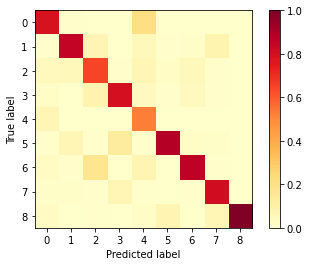

In [0]:
best_clf = (VotingClassifier(estimators = estimators, voting='soft',weights = [2,1,0.5],n_jobs = -1)).fit(Xtrain,Ytrain)
plot_confusion_matrix(best_clf,Xtest,Ytest,normalize='pred',cmap = 'YlOrRd', include_values=False)
print(classification_report(Ytest,best_clf.predict(Xtest))) 
print("\n")

voting ensemble approach was tried, but it gave no advantage over using Decision tree which has the best performance ,therefore ensembled classifier was dropped. Most classifiers are higly corelated to each other, that means they are making the same predictions, so combining them makes no improvement in performance, the classifiers that are not very corelated to each other, it was observed that one of them has very good performance i.e most of its predictions are correct, and the other has very poor performance i.e most of its predcitions are wrong, because of these they are highly not corelated, therefore combining them doesnt improve the performance of the good classifier any further.

# Evaluating performance of Chosen Classifier on the test set

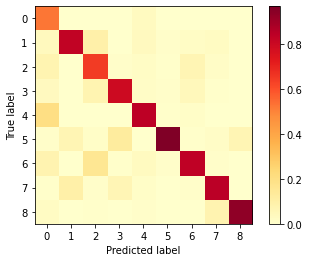

In [0]:
clf_DT = classifiers[2]
plot_confusion_matrix(clf_DT,Xtest,Ytest,normalize='pred',include_values=False,cmap='YlOrRd')

In [0]:
print(classification_report(Ytest, clf_DT.predict(Xtest))) 

              precision    recall  f1-score   support

           0       0.53      0.97      0.68       405
           1       0.83      0.73      0.77       382
           2       0.65      0.77      0.70       405
           3       0.79      0.78      0.79       391
           4       0.84      0.63      0.72       423
           5       0.97      0.70      0.81       368
           6       0.84      0.62      0.71       407
           7       0.85      0.79      0.82       353
           8       0.93      0.86      0.89       354

    accuracy                           0.76      3488
   macro avg       0.80      0.76      0.77      3488
weighted avg       0.80      0.76      0.76      3488



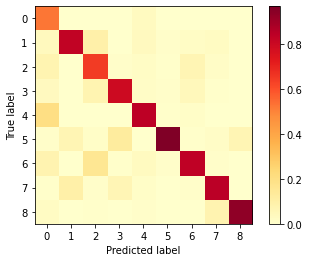

In [0]:
clf_KNN = classifiers[0]
plot_confusion_matrix(clf_DT,Xtest,Ytest,normalize='pred',include_values=False,cmap='YlOrRd')

In [0]:
print(classification_report(Ytest, clf_KNN.predict(Xtest))) 

              precision    recall  f1-score   support

           0       0.78      0.61      0.68       405
           1       0.42      0.78      0.54       382
           2       0.62      0.76      0.68       405
           3       0.77      0.77      0.77       391
           4       0.80      0.64      0.71       423
           5       0.90      0.74      0.81       368
           6       0.90      0.62      0.73       407
           7       0.82      0.86      0.84       353
           8       1.00      0.79      0.88       354

    accuracy                           0.73      3488
   macro avg       0.78      0.73      0.74      3488
weighted avg       0.78      0.73      0.74      3488



In [0]:
k = list(range(1,31,1))
clf = GridSearchCV(clf_KNN,cv = 10,n_jobs = -1,param_grid = {'n_neighbors':k},verbose = 10)
best_clf_KNN = clf.fit(Xtrain,Ytrain)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

In [0]:
best_clf_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [0]:
best_clf_KNN.best_score_

0.7364480646704

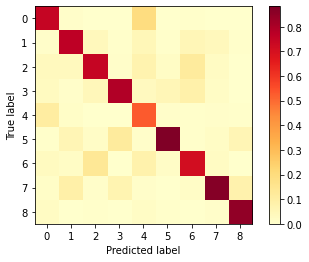

In [0]:
clf_KNN = classifiers[0]
plot_confusion_matrix(best_clf_KNN,Xtest,Ytest,normalize='pred',include_values=False,cmap='YlOrRd')

In [0]:
print(classification_report(Ytest, best_clf_KNN.predict(Xtest))) 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       405
           1       0.77      0.76      0.76       382
           2       0.75      0.66      0.70       405
           3       0.79      0.73      0.76       391
           4       0.53      0.87      0.66       423
           5       0.88      0.71      0.79       368
           6       0.71      0.67      0.69       407
           7       0.87      0.69      0.77       353
           8       0.85      0.92      0.88       354

    accuracy                           0.74      3488
   macro avg       0.77      0.74      0.74      3488
weighted avg       0.76      0.74      0.74      3488



In [0]:
# trying out random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
accuracy_score(Ytest,RandomForestClassifier(n_estimators= 1000).fit(Xtrain,Ytrain).predict(Xtest))

0.7557339449541285

In [0]:
# works no better than a single decision tree, since decision tree is fairly stable
#https://stats.stackexchange.com/questions/241062/why-decision-tree-is-outperforming-random-forest-in-this-simple-case